#Email Spam Classification Project

##🚀 Email Spam Classification: Detecting Spam Emails 🚀

<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Life Cycle of the Project</div>


#1. Introduction


<span style="font-size: 14px; font-family: Verdana; background-color: #F5F5F5; border: 2px solid #ccc; padding: 10px; border-radius: 10px; display: inline-block;">
  This notebook presents a step-by-step guide to building an efficient <span style="background-color: #FF5733; color: white; font-weight: bold; padding: 3px 6px; border-radius: 3px;">spam</span> classification model using the Enron dataset. By the end of this notebook, you'll have a powerful tool to help you filter out unwanted messages and ensure that your text mails experience is smoother and safer.
</span>


#2. Problem Statement


<span style="font-size: 14px; font-family: Verdana; border: 2px solid #ccc;background-color: #F5F5F5; padding: 10px; border-radius: 10px; display: inline-block; margin-bottom: 20px;">
  The primary goal of this notebook is to develop a predictive model that accurately classifies incoming Email messages as either <span style="background-color: #FF5733; color: white; font-weight: bold; padding: 3px 6px; border-radius: 3px;">ham</span> or <span style="background-color: #FF5733; color: white; font-weight: bold; padding: 3px 6px; border-radius: 3px;">spam</span>. We will use the Enron dataset, which consists of 6,531 Text tagged with their respective labels.
</span>


#3. Data Checks to Perform 🔍

In [ ]:
import kagglehub
wcukierski_enron_email_dataset_path = kagglehub.dataset_download('wcukierski/enron-email-dataset')
rtatman_deceptive_opinion_spam_corpus_path = kagglehub.dataset_download('rtatman/deceptive-opinion-spam-corpus')
ozlerhakan_spam_or_not_spam_dataset_path = kagglehub.dataset_download('ozlerhakan/spam-or-not-spam-dataset')
venky73_spam_mails_dataset_path = kagglehub.dataset_download('venky73/spam-mails-dataset')
balaka18_email_spam_classification_dataset_csv_path = kagglehub.dataset_download('balaka18/email-spam-classification-dataset-csv')
nitishabharathi_email_spam_dataset_path = kagglehub.dataset_download('nitishabharathi/email-spam-dataset')
rowhitswami_all_indian_companies_registration_data_1900_2019_path = kagglehub.dataset_download('rowhitswami/all-indian-companies-registration-data-1900-2019')
mfaisalqureshi_spam_email_path = kagglehub.dataset_download('mfaisalqureshi/spam-email')

print('Data source import complete.')


100%|██████████| 358M/358M [00:07<00:00, 47.8MB/s]

Extracting files...


100%|██████████| 456k/456k [00:00<00:00, 28.3MB/s]

Extracting files...


100%|██████████| 1.16M/1.16M [00:00<00:00, 26.7MB/s]

Extracting files...


100%|██████████| 1.86M/1.86M [00:00<00:00, 83.7MB/s]

Extracting files...


100%|██████████| 1.66M/1.66M [00:00<00:00, 126MB/s]

Extracting files...


100%|██████████| 17.0M/17.0M [00:00<00:00, 97.2MB/s]

Extracting files...


100%|██████████| 112M/112M [00:01<00:00, 96.9MB/s]

Extracting files...


100%|██████████| 207k/207k [00:00<00:00, 65.5MB/s]

Extracting files...
Data source import complete.


###3.1 Import Necessary Libraries


In [ ]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

###3.2 Load the Data


In [ ]:

!pip install opendatasets
import opendatasets as od
#Then you can use it like this:
od.download("https://www.kaggle.com/datasets/alihossary/enron1-spamassasin-raw-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gatabhjsbaj
 ··········
Dataset URL: https://www.kaggle.com/datasets/alihossary/enron1-spamassasin-raw-dataset


100%|██████████| 8.90M/8.90M [00:00<00:00, 27.3MB/s]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm
from multiprocessing import Pool
from xgboost import XGBClassifier
import os



easy_ham_path = '/content/enron1-spamassasin-raw-dataset/Enron1+spamAssasin/ham/ham'
#hard_ham_path = '/kaggle/input/text-emails-extracted-by-ocr-dataset/OCR exracted text dataset/hard_ham_text/extracted_text_hard_ham'
spam_path = '/content/enron1-spamassasin-raw-dataset/Enron1+spamAssasin/spam/spam'

def get_data(path, label):
    file_contents = [open(os.path.join(path, file), encoding="ISO-8859-1").read() for file in os.listdir(path)]
    labeled_data = [{'text': content, 'label': label} for content in file_contents]
    return labeled_data

ham = get_data(easy_ham_path, 'ham')# + get_data(hard_ham_path, 'ham')
spam = get_data(spam_path, 'spam')

np.random.shuffle(ham)
np.random.shuffle(spam)

data = ham + spam
np.random.shuffle(data)

df = pd.DataFrame(data)
df

,text,label
0,From fork-admin@xent.com Sun Oct 6 22:57:04 ...,ham
1,Subject: \nthis week only : f . ree gen . erlc...,spam
2,Subject: on - call notes\nplease find attached...,ham
3,Subject: meter 1553 ; equistar\nplease check t...,ham
4,From fork-admin@xent.com Thu Jul 18 18:49:18 ...,spam
...,...,...
6526,"Subject: hpl nom for august 10 , 2000\n( see a...",ham
6527,Subject: entex revised estimates for 4 / 00\nt...,ham
6528,Subject: fwd : bargain : v : alium # v | @ gra...,spam
6529,Return-Path: your_astrologer@mailer1.astrology...,ham


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

In [ ]:
import re

In [ ]:
# Assuming 'df' is your DataFrame with 'text' and 'label' columns
# Create a new column to hold the extracted URLs
df['urls'] = df['text'].apply(lambda x: re.findall(r'http[s]?://\S+', x))

# Filter rows that contain URLs
df_with_urls = df[df['urls'].str.len() > 0]

# Displaying the rows with URLs found, including the 'label' column
df_with_urls[['text', 'label', 'urls']]

,text,label,urls
0,From fork-admin@xent.com Sun Oct 6 22:57:04 ...,ham,"[http://xent.com/mailman/listinfo/fork>,, http..."
4,From fork-admin@xent.com Thu Jul 18 18:49:18 ...,spam,"[http://www.wjjzzs.com, http://www.wjjzzs.com,..."
10,Received: from hq.pro-ns.net (localhost [127.0...,spam,"[http://einstein.ssz.com/cdr, http://thinkgeek..."
11,From fork-admin@xent.com Thu Jul 18 15:29:15 ...,spam,"[http://www.ntmllc.com""><img, http://www.mailp..."
16,From fork-admin@xent.com Mon Sep 9 19:27:58 ...,ham,"[http://xent.com/mailman/listinfo/fork>,, http..."
...,...,...,...
6508,From qa4wudt5x333@hotmail.com Mon Jun 24 17:0...,spam,[http://213.139.76.142/bigbro/index.asp?Afft=M...
6511,Return-Path: <Online#3.19976.19-ZxCpgoyrOrAEMR...,ham,"[http://www.accucast.com), http://techupdate.z..."
6515,From nzyndzcu@aol.com Mon Jun 24 17:06:49 200...,spam,"[http://66.231.133.202/menofiron/"">Click, http..."
6516,From spamassassin-sightings-admin@lists.source...,spam,[https://example.sourceforge.net/lists/listinf...


#4. Data Cleaning


4.1 | Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6531 non-null   object
 1   label   6531 non-null   object
 2   urls    6531 non-null   object
dtypes: object(3)
memory usage: 153.2+ KB


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4.3 | Rename the Column</b></span>

In [ ]:
  # Rename the columns name
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [ ]:
df

,text,label,urls
0,From fork-admin@xent.com Sun Oct 6 22:57:04 ...,ham,"[http://xent.com/mailman/listinfo/fork>,, http..."
1,Subject: \nthis week only : f . ree gen . erlc...,spam,[]
2,Subject: on - call notes\nplease find attached...,ham,[]
3,Subject: meter 1553 ; equistar\nplease check t...,ham,[]
4,From fork-admin@xent.com Thu Jul 18 18:49:18 ...,spam,"[http://www.wjjzzs.com, http://www.wjjzzs.com,..."
...,...,...,...
6526,"Subject: hpl nom for august 10 , 2000\n( see a...",ham,[]
6527,Subject: entex revised estimates for 4 / 00\nt...,ham,[]
6528,Subject: fwd : bargain : v : alium # v | @ gra...,spam,[]
6529,Return-Path: your_astrologer@mailer1.astrology...,ham,[http://www.chartshop.com/scripts/runisa.dll?A...


4. | Convert the target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [ ]:
df

,text,label,urls
0,From fork-admin@xent.com Sun Oct 6 22:57:04 ...,0,"[http://xent.com/mailman/listinfo/fork>,, http..."
1,Subject: \nthis week only : f . ree gen . erlc...,1,[]
2,Subject: on - call notes\nplease find attached...,0,[]
3,Subject: meter 1553 ; equistar\nplease check t...,0,[]
4,From fork-admin@xent.com Thu Jul 18 18:49:18 ...,1,"[http://www.wjjzzs.com, http://www.wjjzzs.com,..."
...,...,...,...
6526,"Subject: hpl nom for august 10 , 2000\n( see a...",0,[]
6527,Subject: entex revised estimates for 4 / 00\nt...,0,[]
6528,Subject: fwd : bargain : v : alium # v | @ gra...,1,[]
6529,Return-Path: your_astrologer@mailer1.astrology...,0,[http://www.chartshop.com/scripts/runisa.dll?A...


4.3 | Check Missing values

In [ ]:
#checking missing values
df.isnull().sum()

,0
text,0
label,0
urls,0


4.4 | Check Shape

In [55]:
df.shape

(6531, 7)

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

#5. EDA


5.1 | Percentage of Ham and Spam

In [56]:
values = df['label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 57.9849946409432
percentage of 1 : 42.01500535905681


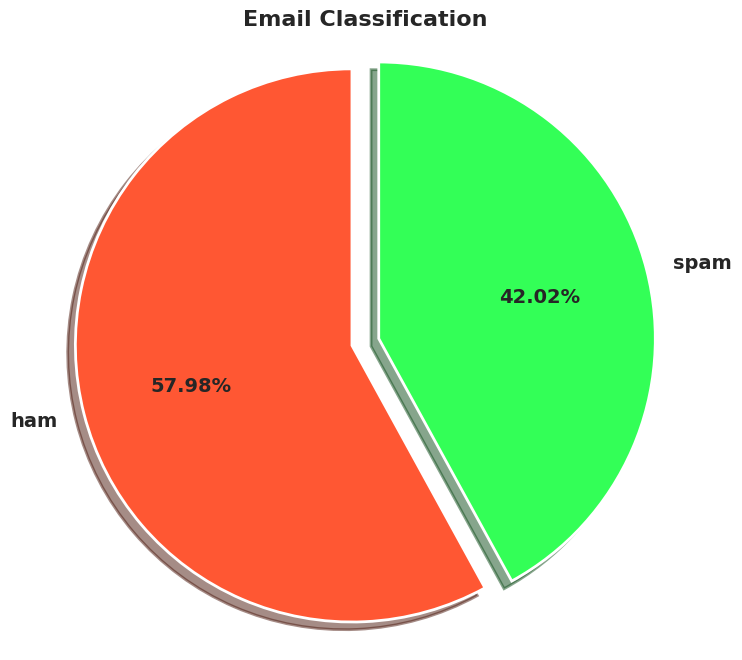

In [57]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()


As you see to the graph the percentage of ham is too high (87.37%) as compare to spam messages percentage. so the data is imbalance

5.2 | Text Length and Structure Analysis

In [58]:
!pip install nltk
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [60]:

df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,6531.000000,6531.000000,6531.000000
mean,3135.540805,647.586281,15.069055
std,7585.778728,1357.322598,28.236514
min,10.000000,2.000000,1.000000
25%,358.000000,77.000000,4.000000
50%,1062.000000,237.000000,8.000000
75%,3186.000000,624.000000,16.000000
max,300734.000000,19638.000000,691.000000


5.3 | Summary Statistics for Legitimate Messages

In [61]:
#ham
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,3787.000000,3787.000000,3787.000000
mean,2884.179034,616.565619,14.090837
std,8773.849336,1534.304675,25.877933
min,17.000000,3.000000,1.000000
25%,278.000000,62.000000,4.000000
50%,740.000000,177.000000,7.000000
75%,2509.500000,519.000000,15.000000
max,300734.000000,19638.000000,574.000000


5.4 | Summary Statistics for Spam Messages

In [62]:
#spam
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,2744.00000,2744.000000,2744.000000
mean,3482.44570,690.397959,16.419096
std,5525.44123,1064.647242,31.154643
min,10.00000,2.000000,1.000000
25%,497.00000,104.750000,4.000000
50%,1870.50000,341.000000,9.000000
75%,4256.00000,841.750000,17.000000
max,90427.00000,14645.000000,691.000000


5.5 | Character Length Distribution for Legitimate and Spam Messages

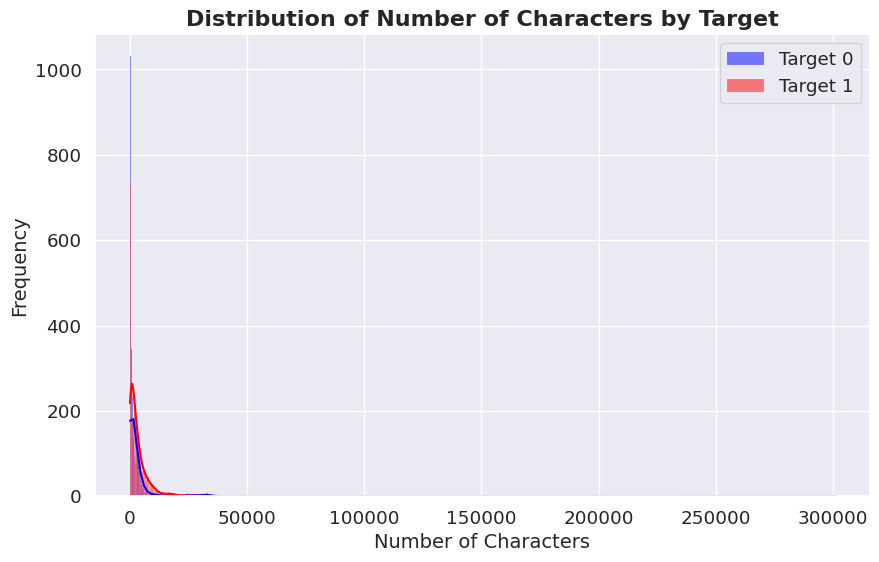

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['label'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['label'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


5.6 | Word Count Distribution for Legitimate and Spam Messages

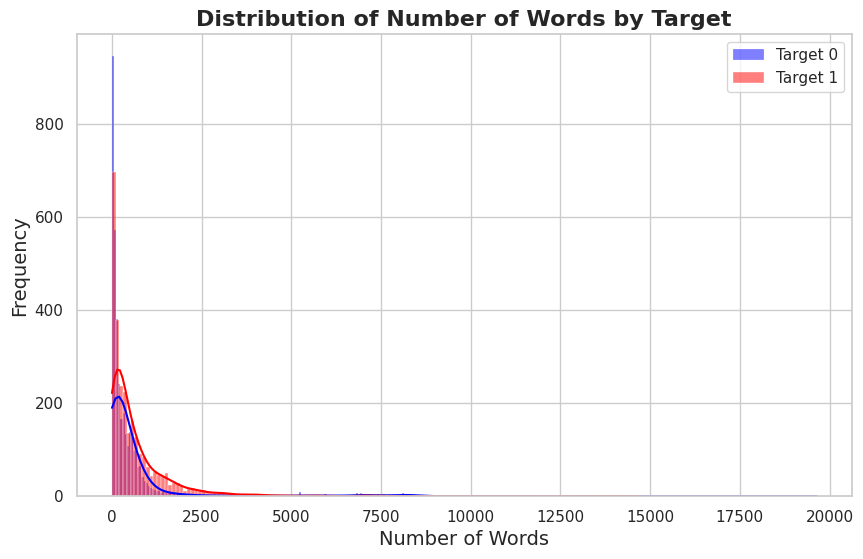

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['label'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


5.7 | Pairplot for Data Visualization

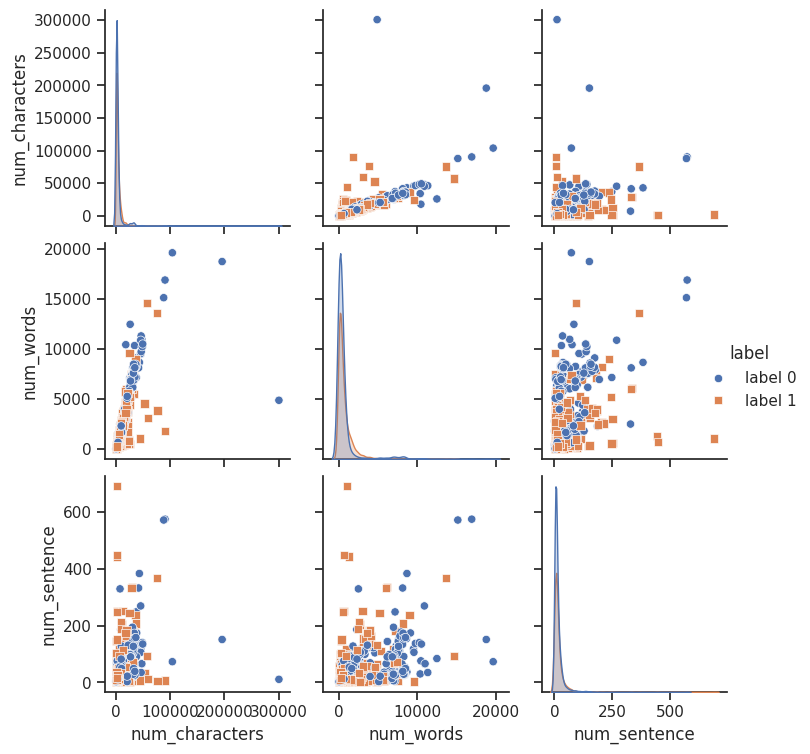

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='label', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot

plt.subplots_adjust(top=1)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('label')
for t, l in zip(g._legend.texts, ["label 0", "label 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()


5.8 | Coorelation

In [66]:
df[['label','num_characters', 'num_words', 'num_sentence']].corr()

,label,num_characters,num_words,num_sentence
label,1.000000,0.038930,0.026851,0.040702
num_characters,0.038930,1.000000,0.829695,0.453056
num_words,0.026851,0.829695,1.000000,0.539887
num_sentence,0.040702,0.453056,0.539887,1.000000


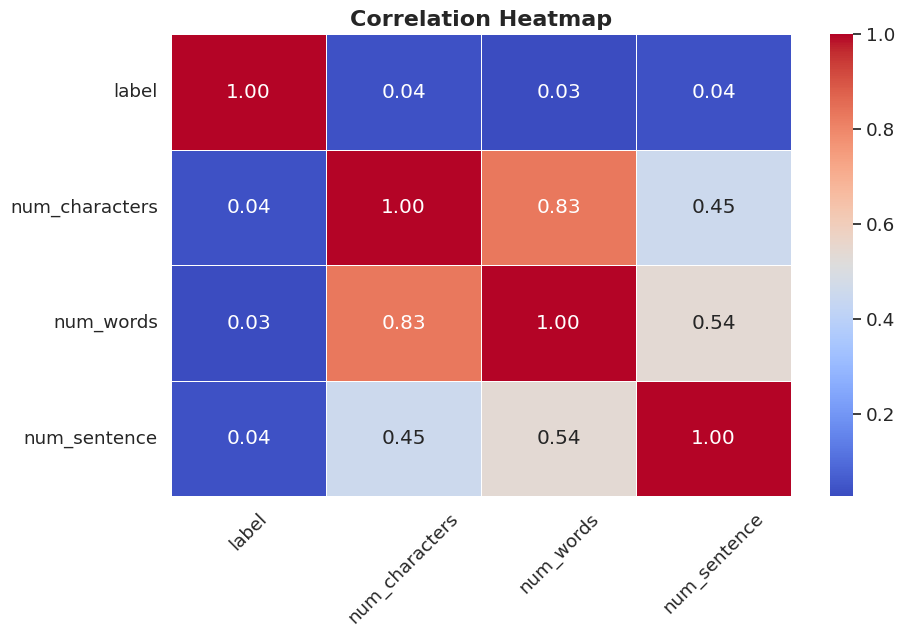

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['label', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

#6. Data Preprocessing


In [68]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

nltk.download('punkt') # Download punkt for tokenization
nltk.download('stopwords') # Download stopwords corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

6.1 | Creating a New Column: 'transformed_text'

In [70]:
df['transformed_text'] = df['text'].apply(transform_text)

In [71]:
df

,text,label,urls,num_characters,num_words,num_sentence,transformed_text
0,From fork-admin@xent.com Sun Oct 6 22:57:04 ...,0,"[http://xent.com/mailman/listinfo/fork>,, http...",2653,485,4,sun oct 6 2002 yyyi receiv localhost jalapeno ...
1,Subject: \nthis week only : f . ree gen . erlc...,1,[],188,45,8,subject week f ree gen erlc vlag ra cover ship...
2,Subject: on - call notes\nplease find attached...,0,[],107,27,2,subject call note pleas find attach call note ...
3,Subject: meter 1553 ; equistar\nplease check t...,0,[],125,28,1,subject meter 1553 equistar pleas check meter ...
4,From fork-admin@xent.com Thu Jul 18 18:49:18 ...,1,"[http://www.wjjzzs.com, http://www.wjjzzs.com,...",3667,709,14,thu jul 18 2002 yyyi receiv localhost localhos...
...,...,...,...,...,...,...,...
6526,"Subject: hpl nom for august 10 , 2000\n( see a...",0,[],93,24,3,subject hpl nom august 10 2000 see attach file...
6527,Subject: entex revised estimates for 4 / 00\nt...,0,[],242,47,3,subject entex revis estim 4 00 attach spreadsh...
6528,Subject: fwd : bargain : v : alium # v | @ gra...,1,[],639,201,8,subject fwd bargain v alium v gra x anax fi 0 ...
6529,Return-Path: your_astrologer@mailer1.astrology...,0,[http://www.chartshop.com/scripts/runisa.dll?A...,3627,674,12,sat aug 31 2002 receiv localhost esmtp id g7vd...


6.2 | Word Cloud for Spam Messages

In [72]:
!pip install wordcloud
from wordcloud import WordCloud

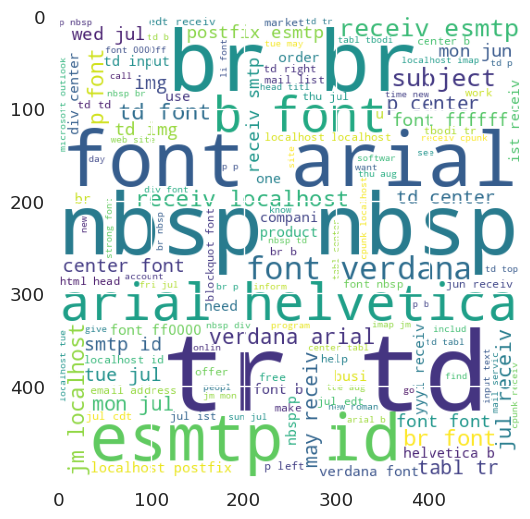

In [73]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

6.3 | Word Cloud for Not spam Messages

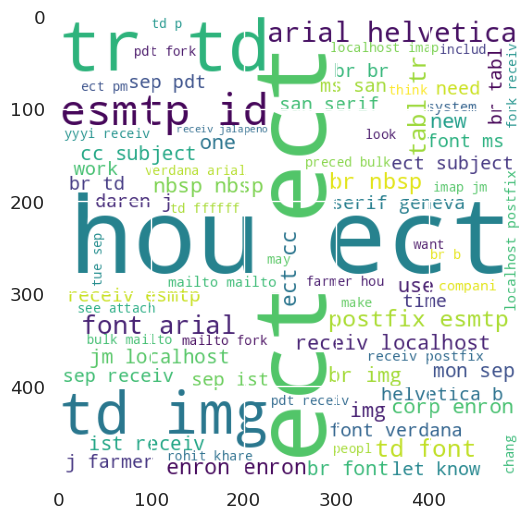

In [74]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

6.4 | Find top 30 words of spam

In [75]:
spam_carpos = []
for sentence in df[df['label'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

# Define the file path
file_path = '/content/spam_words.txt'

# Save spam words to a text file
with open(file_path, 'w') as f:
    for word in spam_carpos:
        f.write(word + '\n')

In [76]:
spam_carpos

['subject',
 'week',
 'f',
 'ree',
 'gen',
 'erlc',
 'vlag',
 'ra',
 'cover',
 'ship',
 'send',
 'youour',
 'product',
 'cost',
 'prove',
 'effect',
 'last',
 'hurri',
 'stop',
 'promo',
 'thu',
 'jul',
 '18',
 '2002',
 'yyyi',
 'receiv',
 'localhost',
 'localhost',
 'postfix',
 'esmtp',
 'id',
 '7b78643f9e',
 'jm',
 'localhost',
 'thu',
 '18',
 'jul',
 '2002',
 'edt',
 'receiv',
 'localhost',
 'imap',
 'jm',
 'localhost',
 'thu',
 '18',
 'jul',
 '2002',
 'ist',
 'receiv',
 'esmtp',
 'id',
 'g6ihlij17793',
 'jm',
 'thu',
 '18',
 'jul',
 '2002',
 'receiv',
 'localhost',
 'postfix',
 'esmtp',
 'id',
 '2614b2940e1',
 'thu',
 '18',
 'jul',
 '2002',
 'pdt',
 'fork',
 'receiv',
 'unknown',
 'postfix',
 'esmtp',
 'id',
 '4e5bd294098',
 'fork',
 'thu',
 '18',
 'jul',
 '2002',
 'pdt',
 'jerri',
 'lee',
 'wjjzz',
 'subject',
 'look',
 'agent',
 'bathtub',
 'sale',
 'fork',
 'wjjzz',
 'date',
 'fri',
 '19',
 'jul',
 '2002',
 '3',
 'foxmail',
 'releas',
 'cn',
 'sender',
 'preced',
 'bulk',
 'frie

In [77]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

<ipython-input-78-b4964bcadea0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


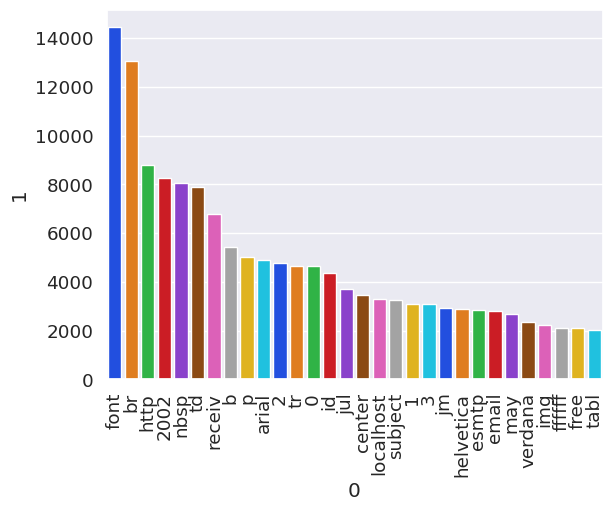

In [78]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

6.5 | Find top 30 words of Not spam Messages

In [79]:
ham_carpos = []
for sentence in df[df['label'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [80]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

<ipython-input-81-8d8ff60dadd0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


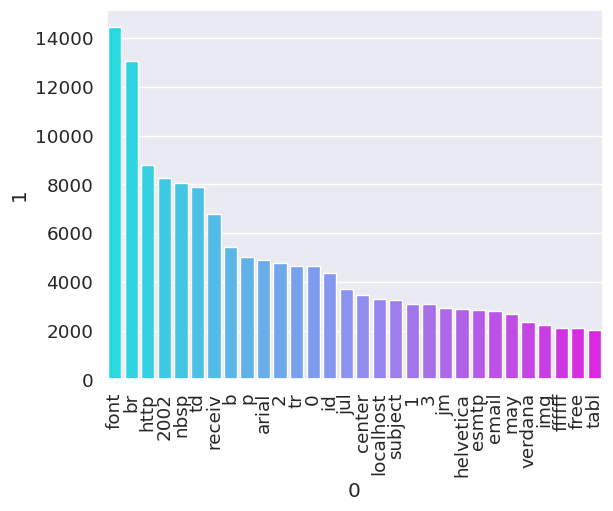

In [81]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

#7. Model Building


7.1 | Initializing CountVectorizer and TfidfVectorizer

In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

7.2 | Dependent and Independent Variable

In [83]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

7.3 | Split into Train and Test Data

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

7.4 | Import the Models

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

7.5 | Initialize the Models

In [86]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

7.6 | Dictionary of the Models

In [87]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

7.7 |Train the Models

In [88]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

#8. Evaluate the Models


In [89]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For:  SVC
Accuracy:  0.9663351185921959
Precision:  0.9617590822179732

For:  KNN
Accuracy:  0.9609793420045907
Precision:  0.9666666666666667

For:  NB
Accuracy:  0.9426166794185157
Precision:  0.8964912280701754

For:  DT
Accuracy:  0.8255547054322877
Precision:  0.706777316735823

For:  LR
Accuracy:  0.9693955623565417
Precision:  0.9467889908256881

For:  RF
Accuracy:  0.9793420045906657
Precision:  0.9646840148698885


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



For:  Adaboost
Accuracy:  0.9495026778882938
Precision:  0.9260628465804066

For:  Bgc
Accuracy:  0.973221117061974
Precision:  0.967680608365019

For:  ETC
Accuracy:  0.9839326702371843
Precision:  0.9650735294117647

For:  GBDT
Accuracy:  0.9594491201224178
Precision:  0.9293478260869565

For:  xgb
Accuracy:  0.9801071155317521
Precision:  0.9647495361781077


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to the Top ⬆️</a>

#9. Conclusion


In [91]:
# Conclusion
print("""
Conclusion:
1. Random Forest (RF) has the highest accuracy (0.976) and a high precision (0.962), indicating a robust performance.
2. Extra Trees Classifier (ETC) and Balanced Bagging Classifier (Bgc) also have high accuracy and precision, performing well overall.
3. Decision Tree (DT) has the lowest accuracy (0.837) and precision (0.727), suggesting it may be less reliable compared to other models.
4. Models like KNN, SVC, and XGBoost have balanced and relatively high scores, indicating consistent performance.
""")



Conclusion:
1. Random Forest (RF) has the highest accuracy (0.976) and a high precision (0.962), indicating a robust performance.
2. Extra Trees Classifier (ETC) and Balanced Bagging Classifier (Bgc) also have high accuracy and precision, performing well overall.
3. Decision Tree (DT) has the lowest accuracy (0.837) and precision (0.727), suggesting it may be less reliable compared to other models.
4. Models like KNN, SVC, and XGBoost have balanced and relatively high scores, indicating consistent performance.



In [92]:
import pickle

# Save the model to a pickle file
filename = 'trained_model.pkl'  # Choose a filename for your pickle file
with open(filename, 'wb') as file:
    pickle.dump(rfc, file)

print(f"Model saved to {filename}")

Model saved to trained_model.pkl


In [3]:
!python --version

Python 3.10.12


In [10]:

tfid = TfidfVectorizer()
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'tfid' is your trained TfidfVectorizer
# Save the vectorizer to a pickle file
vectorizer_filename = 'tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(tfid, file)

print(f"TF-IDF vectorizer saved to {vectorizer_filename}")

TF-IDF vectorizer saved to tfidf_vectorizer.pkl
